In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [2]:
from datetime import datetime

In [3]:
fromjapanData = pd.read_csv('from_japan.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
fromjapanData.head(10)

,genre_ids,id,name,origin_country,original_name,overview,vote_average
first_air_date,,,,,,,
2021-09-10,"[16, 18, 10765]",120471,The Ancient Magus' Bride: The Boy From the Wes...,['JP'],魔法使いの嫁 西の少年と青嵐の騎士,"Gabriel, an ordinary boy who just moved from L...",0.0
2021-05-01,"[10765, 16, 18]",92584,Eden,['JP'],エデン,"Thousands of years in the future, a city known...",0.0
2021-04-15,"[16, 18, 10759]",112615,Cestvs: The Roman Fighter,['JP'],セスタス -The Roman Fighter-,NaN,0.0
2021-04-14,"[16, 35]",110975,The Romcom Where the Childhood Friend Won't Lose!,['JP'],幼なじみが絶対に負けないラブコメ,My childhood friend Shida Kuroha seems to have...,0.0
2021-04-12,"[16, 18, 10759, 10765]",97525,To Your Eternity,['JP'],不滅のあなたへ,An immortal being was sent to the surface of t...,0.0
2021-04-11,"[16, 35, 9648]",113042,Pretty Boy Detective Club,['JP'],美少年探偵団,NaN,0.0
2021-04-11,"[16, 9648]",111576,Shadows House,['JP'],シャドーハウス,NaN,0.0
2021-04-11,"[16, 35]",105556,"Don't Toy With Me, Miss Nagatoro",['JP'],イジらないで、長瀞さん,Mischievous Nagatoro-san always bugs Senpai to...,0.0
2021-04-11,"[16, 18, 10759]",105009,Tokyo Revengers,['JP'],東京リベンジャーズ,"Watching the news, Hanagaki Takemichi learns t...",0.0


In [4]:
pd.set_option('display.max_rows', 120)
fromjapanData.dtypes

genre_ids          object
id                  int64
name               object
origin_country     object
original_name      object
overview           object
vote_average      float64
dtype: object

In [5]:
numericfromjapanData = fromjapanData.select_dtypes(include=['float64'])
numericfromjapanData

,vote_average
first_air_date,
2021-09-10,0.0
2021-05-01,0.0
2021-04-15,0.0
2021-04-14,0.0
2021-04-12,0.0
...,...
NaT,0.0
NaT,0.0
NaT,0.0


In [8]:
numericfromjapanData = numericfromjapanData[numericfromjapanData.vote_average != 0.0]
numericfromjapanData

,vote_average
first_air_date,
2021-02-25,8.3
2021-02-14,4.8
2021-01-13,9.3
2021-01-13,9.1
2021-01-12,4.7
...,...
NaT,5.0
NaT,7.0
NaT,6.4


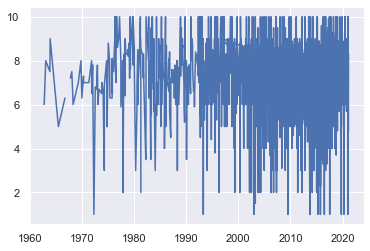

In [10]:
plt.plot(numericfromjapanData)
plt.show()

In [11]:
numericfromjapanData.describe()

,vote_average
count,2400.000000
mean,7.264583
std,1.477689
min,1.000000
25%,6.500000
50%,7.500000
75%,8.200000
max,10.000000


In [12]:
# Calculate the quartiles
Q1 = numericfromjapanData.quantile(0.25)
Q3 = numericfromjapanData.quantile(0.75)

# Rule to identify outliers
rule = ((numericfromjapanData < (Q1 - 1.5 * (Q3 - Q1))) | (numericfromjapanData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

vote_average    68
dtype: int64